In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import os
import json

/home/devuser/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import FRIB_model as frib

FRIB_model version: 1.0.0. updated on 2024-03-05


In [3]:
fm = frib.fmh.ModelFlame('./flame_reconst_input.lat')

In [4]:
r0,s0 = fm.run(monitor='all')
r0 = fm.collect_data(r0,'pos','xrms','yrms')

# use names for from_elem and to_elem

In [5]:
r1,s1 = fm.run(monitor='all',to_element='BDS_BTS:QV_D5501')
r1 = fm.collect_data(r1,'pos','xrms','yrms')

In [6]:
r2,s2 = fm.run(bmstate=s1, monitor='all',from_element='BDS_BTS:QV_D5501')
r2 = fm.collect_data(r2,'pos','xrms','yrms')

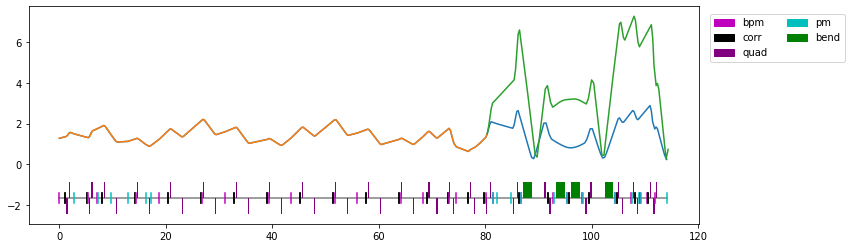

In [7]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(r0['pos'],r0['xrms'])
ax.plot(r1['pos'],r1['xrms'])
ax.plot(r2['pos'],r2['xrms'])
frib.fmh.plot_lattice(fm,ax)

# use index for from_elem-1 and to_elem

In [8]:
ielem = fm.get_index_by_name('BDS_BTS:QV_D5501')['BDS_BTS:QV_D5501'][0]

In [9]:
r1,s1 = fm.run(monitor='all',to_element=ielem-1)
r1 = fm.collect_data(r1,'pos','xrms','yrms')

In [10]:
r2,s2 = fm.run(bmstate=s1, monitor='all',from_element=ielem)
r2 = fm.collect_data(r2,'pos','xrms','yrms')

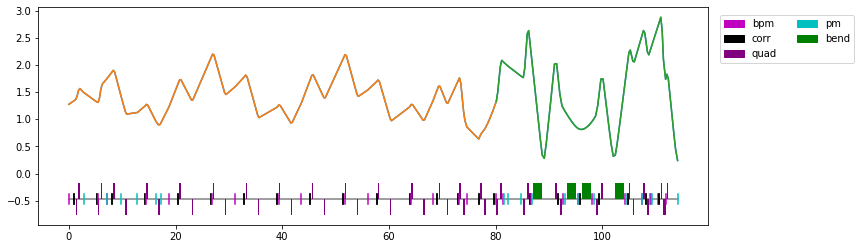

In [11]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(r0['pos'],r0['xrms'])
ax.plot(r1['pos'],r1['xrms'])
ax.plot(r2['pos'],r2['xrms'])
frib.fmh.plot_lattice(fm,ax)